In [8]:
# Author: Naziah Siddique 29-06-21 

# Create an annotation file from an existing one 

from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import skimage.io as io


from pathlib import Path
import json

from fastai.vision.all import *

pylab.rcParams['figure.figsize'] = (8.0, 10.0)

data_dir = Path('../../data/')

In [20]:
coco_ann_val = data_dir / Path('annotations/instances_val2017.json')
coco_img_val = data_dir / Path('images/val2017/')
coco=COCO(coco_ann_val)

loading annotations into memory...
Done (t=0.64s)
creating index...
index created!


In [10]:
# get all images containing given categories, in this case all the people 
catIds = coco.getCatIds(catNms=['person']);
imgIds = coco.getImgIds(catIds=catIds );
imgs = coco.loadImgs(imgIds)

In [11]:
# Get all annotations for the images and the category we need (i.e. all person(s))
annIds = coco.getAnnIds(imgIds=[i['id'] for i in imgs], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)

In [12]:
# Create our dictionary and dump into a json file 
new_annotations = {
    "images":imgs, 
    "annotations":anns, 
    "categories":[{
      "supercategory": "person",
      "id": 1,
      "name": "person"
    },]}

with open('slice.json', 'w') as f:
    json.dump(new_annotations, f)

In [13]:
# Fast.ai method to parse COCO annotations 
imgs, lbl_bbox = get_annotations('slice.json')
img2bbox = dict(zip(imgs, lbl_bbox))

In [14]:
first = {k: img2bbox[k] for k in list(img2bbox)[:1]}; first
getters = [lambda o: coco_img_val/o, lambda o: img2bbox[o][0], lambda o: img2bbox[o][1]]

In [29]:
item_tfms = [Resize(128)]
# item_tfms = [Resize(128, method='crop'),]
batch_tfms = [Normalize.from_stats(*imagenet_stats)]

In [30]:
def get_train_imgs(noop):  return imgs

In [31]:
pascal = DataBlock(blocks=(ImageBlock, BBoxBlock, BBoxLblBlock),
                 splitter=RandomSplitter(),
                 get_items=get_train_imgs,
                 getters=getters,
                 item_tfms=item_tfms,
#                  batch_tfms=batch_tfms,
                 n_inp=1)

In [32]:
dls = pascal.dataloaders(coco_img_val)

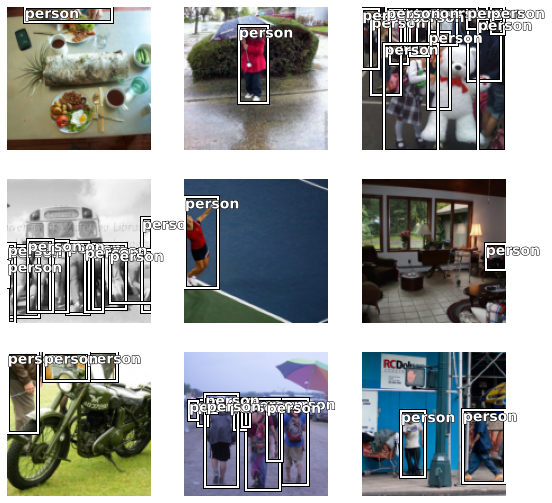

In [33]:
# tada! all annotations are just people 
dls.show_batch()

In [35]:
len(imgs)

2693

In [36]:
len(imgIds)

2693